# Assigning income level to country based on features and year

Income Level classification is assigned by World Bank. Levels are 
- Low
- Low_middle
- Middle-High
- High

World Bank has only values for the present time (2010++). 
Based on existing dataset and indicators, we will build a classifier that can be applied to predict *Income Level* for any year since 1960 for any country.

## 1. Uploading and reformatting dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing WBI Dataset (the final and cleaned one, called OUTPUT....)
df = pd.read_csv('Data_output/WBI_final.csv', sep=';', low_memory = False)

In [3]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
0,1960,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,51.537,0.200033,1.419262,NaN,26.500
1,1961,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,52.560,0.200033,1.419262,NaN,25.617
2,1962,ARE,United Arab Emirates,NaN,0.044596,1166.7,4.13,16.526857,103604.9068,0.0,53.573,0.200033,1.578682,NaN,24.752
3,1963,ARE,United Arab Emirates,NaN,0.039958,1166.7,4.26,16.526857,103604.9068,0.0,54.572,0.200033,1.761898,NaN,23.907
4,1964,ARE,United Arab Emirates,NaN,0.036222,1166.7,4.41,16.526857,103604.9068,0.0,55.555,0.200033,1.943664,NaN,23.081


In [4]:
# uploading dataset that contains recent income level category per country
IL_recent = pd.read_csv('Data_input/Income_level_recent.csv', sep=';', low_memory = False)

In [5]:
IL_recent.head()

,Country Code,Income_level_recent
0,ABW,High
1,AFG,Low
2,AGO,Low_Middle
3,ALB,High_Middle
4,AND,High


In [6]:
df= pd.merge(df, IL_recent, how='left', left_on=['Country Code'], right_on=['Country Code'])

In [7]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent
0,1960,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,51.537,0.200033,1.419262,NaN,26.500,High
1,1961,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,52.560,0.200033,1.419262,NaN,25.617,High
2,1962,ARE,United Arab Emirates,NaN,0.044596,1166.7,4.13,16.526857,103604.9068,0.0,53.573,0.200033,1.578682,NaN,24.752,High
3,1963,ARE,United Arab Emirates,NaN,0.039958,1166.7,4.26,16.526857,103604.9068,0.0,54.572,0.200033,1.761898,NaN,23.907,High
4,1964,ARE,United Arab Emirates,NaN,0.036222,1166.7,4.41,16.526857,103604.9068,0.0,55.555,0.200033,1.943664,NaN,23.081,High


In [8]:
df['id'] = df["Country Code"]+ df["Year"].astype(str)

In [9]:
df.set_index('id', inplace = True)

In [10]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent
id,,,,,,,,,,,,,,,,
ARE1960,1960,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,51.537,0.200033,1.419262,NaN,26.500,High
ARE1961,1961,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,52.560,0.200033,1.419262,NaN,25.617,High
ARE1962,1962,ARE,United Arab Emirates,NaN,0.044596,1166.7,4.13,16.526857,103604.9068,0.0,53.573,0.200033,1.578682,NaN,24.752,High
ARE1963,1963,ARE,United Arab Emirates,NaN,0.039958,1166.7,4.26,16.526857,103604.9068,0.0,54.572,0.200033,1.761898,NaN,23.907,High
ARE1964,1964,ARE,United Arab Emirates,NaN,0.036222,1166.7,4.41,16.526857,103604.9068,0.0,55.555,0.200033,1.943664,NaN,23.081,High


## 2. Building the classifier using Random Forest

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df.shape

(4920, 16)

In [13]:
df.isna().sum()

Year                                                      0
Country Code                                              0
Country Name                                              0
Air transport, freight (million ton-km)                1688
Arable land (hectares per person)                         0
Cereal yield (kg per hectare)                           180
Food production index (2004-2006 = 100)                   0
GDP growth (annual %)                                    98
GDP per capita (constant 2010 US$)                      180
Net flows from UN agencies US$                            0
Life expectancy at birth, total (years)                   0
Mobile cellular subscriptions (per 100 people)            0
Population density (people per sq. km of land area)       0
Adjusted savings: education expenditure (% of GNI)      180
Rural population (% of total population)                  0
Income_level_recent                                       0
dtype: int64

In [14]:
# We'll create a new df2 to work with
df2 = df.fillna(df.mean()) #as there are some missing values, well fill them with mean()

In [15]:
#Selecting only rows with years >= 2010 to build the classifier, because the income_level is only accurate for recent years

df_recent = df2[df2['Year'] >= 2010]
df_recent.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent
id,,,,,,,,,,,,,,,,
ARE2010,2010,ARE,United Arab Emirates,9774.150415,0.005918,17871.4,110.01,1.602810,33893.30351,0.0,76.332,127.789875,120.388454,3.833964,15.913,High
ARE2011,2011,ARE,United Arab Emirates,10434.849190,0.005041,22276.8,64.26,6.930272,34634.86214,0.0,76.521,131.079617,125.975458,3.833964,15.577,High
ARE2012,2012,ARE,United Arab Emirates,12032.543630,0.004058,11528.5,64.57,4.484626,35416.89178,0.0,76.711,150.687604,128.718615,3.833964,15.251,High
ARE2013,2013,ARE,United Arab Emirates,14082.254740,0.004077,15805.3,66.66,5.053346,36978.83304,0.0,76.903,174.643446,129.511546,3.833964,14.934,High
ARE2014,2014,ARE,United Arab Emirates,15527.192870,0.004775,12542.9,83.01,4.284304,38495.04635,0.0,77.095,182.534237,129.740566,3.833964,14.625,High


In [16]:
X = df_recent[df_recent.columns[3:15]]  # Features
y = df_recent['Income_level_recent']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 70% training and 30% test

In [17]:
X.head()

,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
id,,,,,,,,,,,,
ARE2010,9774.150415,0.005918,17871.4,110.01,1.602810,33893.30351,0.0,76.332,127.789875,120.388454,3.833964,15.913
ARE2011,10434.849190,0.005041,22276.8,64.26,6.930272,34634.86214,0.0,76.521,131.079617,125.975458,3.833964,15.577
ARE2012,12032.543630,0.004058,11528.5,64.57,4.484626,35416.89178,0.0,76.711,150.687604,128.718615,3.833964,15.251
ARE2013,14082.254740,0.004077,15805.3,66.66,5.053346,36978.83304,0.0,76.903,174.643446,129.511546,3.833964,14.934
ARE2014,15527.192870,0.004775,12542.9,83.01,4.284304,38495.04635,0.0,77.095,182.534237,129.740566,3.833964,14.625


In [18]:
y.head()

id
ARE2010    High
ARE2011    High
ARE2012    High
ARE2013    High
ARE2014    High
Name: Income_level_recent, dtype: object

In [19]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9959349593495935


In [21]:
metrics.confusion_matrix(y_test, y_pred)

array([[78,  1,  0,  0],
       [ 0, 58,  0,  0],
       [ 0,  0, 36,  0],
       [ 0,  0,  0, 73]], dtype=int64)

In [22]:
importances = clf.feature_importances_

In [23]:
cols = X.columns

In [24]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



Feature ranking:
1. feature 5 (0.334581) GDP per capita (constant 2010 US$)
2. feature 7 (0.163515) Life expectancy at birth, total (years)
3. feature 11 (0.092127) Rural population (% of total population)
4. feature 6 (0.086369) Net flows from UN agencies US$
5. feature 1 (0.058481) Arable land (hectares per person)
6. feature 2 (0.053076) Cereal yield (kg per hectare)
7. feature 8 (0.051550) Mobile cellular subscriptions (per 100 people)
8. feature 10 (0.042149) Adjusted savings: education expenditure (% of GNI)
9. feature 3 (0.041517) Food production index (2004-2006 = 100)
10. feature 9 (0.032294) Population density (people per sq. km of land area)
11. feature 0 (0.024789) Air transport, freight (million ton-km)
12. feature 4 (0.019552) GDP growth (annual %)


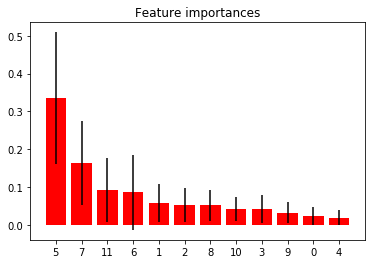

In [25]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), cols[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 3. Generating predicted *Income_level* column in df

In [26]:
df_features = df2[df2.columns[3:15]] #selectiong df with features

In [27]:
df_features.head()

,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
id,,,,,,,,,,,,
ARE1960,1126.2264,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,51.537,0.200033,1.419262,3.833964,26.500
ARE1961,1126.2264,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,52.560,0.200033,1.419262,3.833964,25.617
ARE1962,1126.2264,0.044596,1166.7,4.13,16.526857,103604.9068,0.0,53.573,0.200033,1.578682,3.833964,24.752
ARE1963,1126.2264,0.039958,1166.7,4.26,16.526857,103604.9068,0.0,54.572,0.200033,1.761898,3.833964,23.907
ARE1964,1126.2264,0.036222,1166.7,4.41,16.526857,103604.9068,0.0,55.555,0.200033,1.943664,3.833964,23.081


In [28]:
df2['Pred_Income_level'] = clf.predict(df_features)

In [29]:
df2.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent,Pred_Income_level
id,,,,,,,,,,,,,,,,,
ARE1960,1960,ARE,United Arab Emirates,1126.2264,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,51.537,0.200033,1.419262,3.833964,26.500,High,High
ARE1961,1961,ARE,United Arab Emirates,1126.2264,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,52.560,0.200033,1.419262,3.833964,25.617,High,High
ARE1962,1962,ARE,United Arab Emirates,1126.2264,0.044596,1166.7,4.13,16.526857,103604.9068,0.0,53.573,0.200033,1.578682,3.833964,24.752,High,High
ARE1963,1963,ARE,United Arab Emirates,1126.2264,0.039958,1166.7,4.26,16.526857,103604.9068,0.0,54.572,0.200033,1.761898,3.833964,23.907,High,High
ARE1964,1964,ARE,United Arab Emirates,1126.2264,0.036222,1166.7,4.41,16.526857,103604.9068,0.0,55.555,0.200033,1.943664,3.833964,23.081,High,High


In [30]:
# We are going to create a new column (Income_level_Final) that chooses a value if year is recent, and chooses the predicted value if year is earlier.
# After that, we'll merge that column to the original df dataset, that still has nan values

df2['Income_level_Final'] = np.where(df2['Year'] >= 2010, df2['Income_level_recent'], df2['Pred_Income_level'])

In [31]:
df2 = df2[['Country Code', 'Year', 'Income_level_Final']]

In [32]:
df= pd.merge(df, df2, how='left', left_on=['Country Code', 'Year'], right_on= ['Country Code', 'Year'])

In [33]:
df= df.drop('Income_level_recent', axis=1)

In [34]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final
0,1960,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,51.537,0.200033,1.419262,NaN,26.500,High
1,1961,ARE,United Arab Emirates,NaN,0.049605,1166.7,4.07,16.526857,103604.9068,0.0,52.560,0.200033,1.419262,NaN,25.617,High
2,1962,ARE,United Arab Emirates,NaN,0.044596,1166.7,4.13,16.526857,103604.9068,0.0,53.573,0.200033,1.578682,NaN,24.752,High
3,1963,ARE,United Arab Emirates,NaN,0.039958,1166.7,4.26,16.526857,103604.9068,0.0,54.572,0.200033,1.761898,NaN,23.907,High
4,1964,ARE,United Arab Emirates,NaN,0.036222,1166.7,4.41,16.526857,103604.9068,0.0,55.555,0.200033,1.943664,NaN,23.081,High


In [36]:
# Writing to csv the final Dataset to be merged with other dataset from cyclones...

df.to_csv(r'Data_output/WBI_Final_IL.csv', index = False, sep = ';')